## Install packages

In [4]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Generate graph

In [55]:
set.seed(12345)
pl = c(0.003,0.004,0.01,0.05,0.1)
gl_map = c()
for( p in pl){
    g = erdos.renyi.game(1000, p, directed=F)
    degreesVector <- degree(g)
    #hist(degreesVector)
    print(mean(degreesVector))
    print(is.connected(g))
    #print(var(degreesVector))
    #plot(g,vertex.size=1, vertex.label.cex=0.1)    
    g.components <- clusters(g)
    #print(g.components$csize)
    # which is the largest component
    ix <- which.max(g.components$csize)
    # get the subgraph correspondent to just the giant component
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    print(vcount(g.giant))
}

[1] 3.144
[1] FALSE
[1] 937
[1] 4.116
[1] FALSE
[1] 983
[1] 9.854
[1] TRUE
[1] 1000
[1] 50.34
[1] TRUE
[1] 1000
[1] 99.236
[1] TRUE
[1] 1000


In [57]:
pl2 = c(0.001, 0.002, 0.0025, 0.003,0.004,0.006,0.008,0.01,0.05,0.1)

In [63]:
print(rep('1',10))

 [1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"


In [64]:
x = c()
for(p in pl2){
    x = c(x, rep(p,100))
}

In [67]:
cl = c()
for( p in pl2){
    for(i in 1:100){
        g = erdos.renyi.game(1000, p, directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
       # print(vcount(g.giant)/1000)
        cl = c(cl,vcount(g.giant)/1000)
    }
    
}


In [93]:
library('RColorBrewer')
colbox<-brewer.pal(n=10,name="Set3")


In [94]:
cols_ = c()
for(x_ in x){
    cols_ = c(cols_,colbox[match(x,pl2)])
}


In [95]:
print(cols)

 [1] "#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69"
 [8] "#FCCDE5" "#D9D9D9" "#BC80BD"


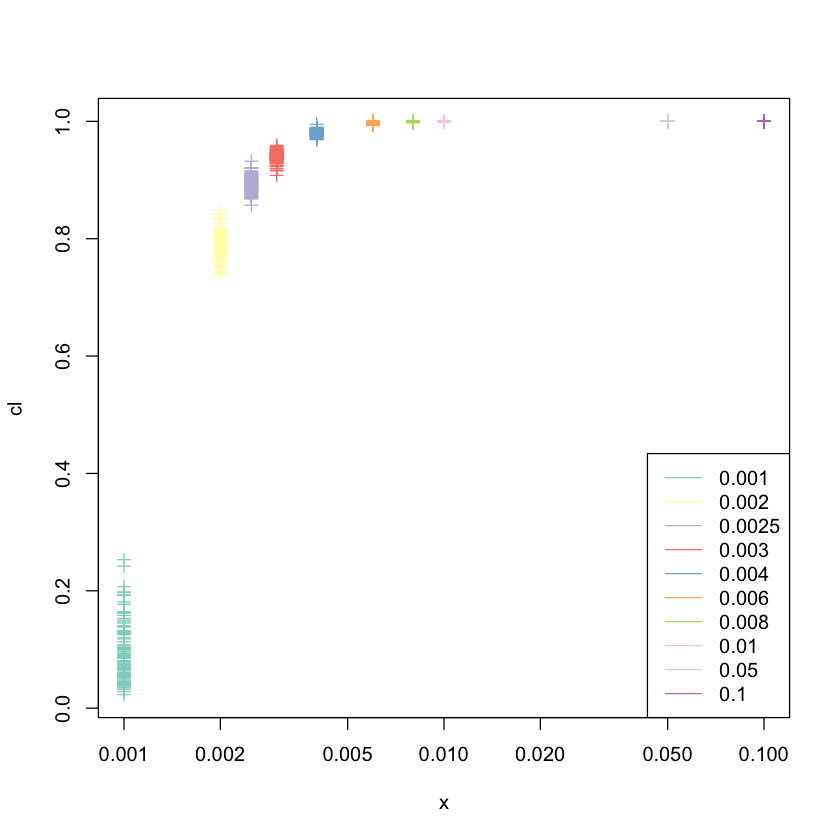

In [110]:
plot(x, cl, pch = 3,log='x', col = cols_)
legend("bottomright", legend=pl2,col=cols, lwd=1)


In [8]:
c = 0.5


In [14]:
get_expected_gcc <- function(deg){
    set.seed(12345)
    nrange <- 1:100
    iter <- 1:100
    cl =c()
    for(n in nrange){
        temp = c()
        for(i in iter){
        g = erdos.renyi.game(n*100, deg/(n*100), directed=F)
        degreesVector <- degree(g)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        #print(vcount(g.giant))
        temp = c(temp,vcount(g.giant))
        }
        cl = c(cl,mean(temp))
    }
    return(cl)
}

In [15]:
print(get_expected_gcc(0.5))

  [1]  6.00  7.35  8.54  8.96  9.91 10.07 10.31 10.24 11.17 11.26 11.87 12.23
 [13] 11.95 12.49 12.68 12.40 13.02 12.57 12.82 13.13 13.50 13.40 13.60 13.86
 [25] 13.84 14.07 13.86 14.26 14.69 14.27 14.90 14.17 15.18 15.05 14.36 15.71
 [37] 14.50 14.31 15.51 15.26 15.81 15.34 14.82 16.08 15.98 15.92 15.55 15.99
 [49] 15.98 16.48 15.49 16.44 16.32 16.53 15.93 17.02 16.60 17.02 15.91 15.66
 [61] 16.38 16.31 17.56 17.45 16.68 16.77 16.39 16.92 16.59 17.47 17.68 17.10
 [73] 17.05 16.71 17.63 16.94 17.29 18.13 17.00 17.43 17.45 17.67 17.53 17.74
 [85] 17.67 17.74 18.28 17.91 18.33 17.68 18.47 18.23 17.99 18.00 17.82 18.36
 [97] 18.24 17.84 17.93 18.60


[1] 1.998
[1] TRUE
[1] 1000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“8 y values <= 0 omitted from logarithmic plot”

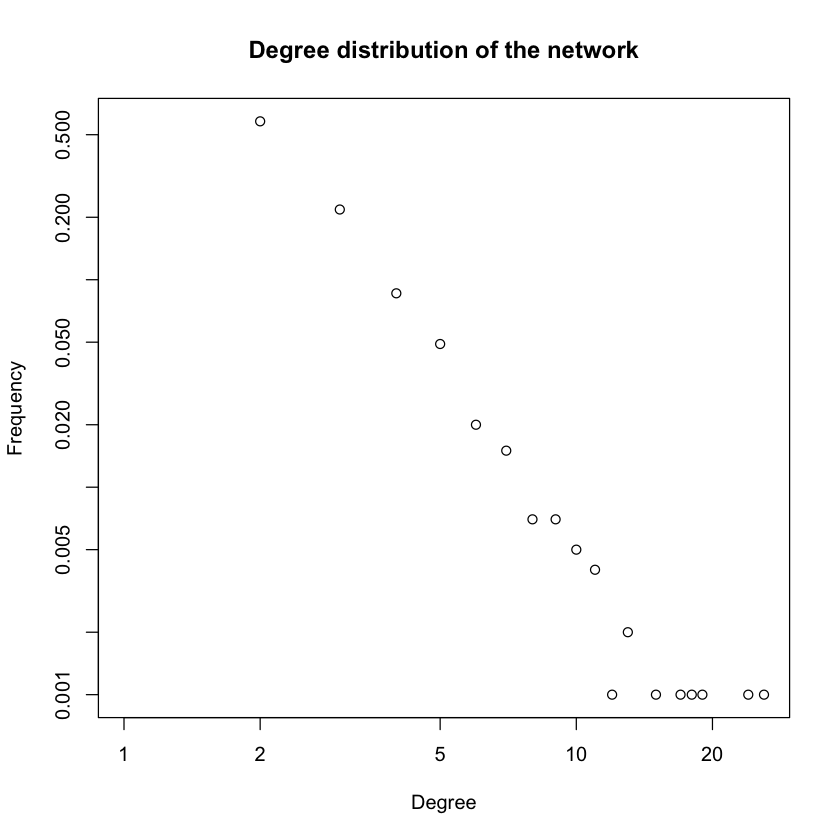

In [33]:
##check if its simple_pa
g = barabasi.game(1000, m=1, directed=F)
degreesVector <- degree(g)
#hist(degreesVector)
print(mean(degreesVector))
print(is.connected(g))
#print(var(degreesVector))
#plot(g,vertex.size=5, vertex.label.cex=0.1)    
g.components <- clusters(g)
#print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fg <- fastgreedy.community(g)
#cmsize <- sizes(fg)
#print(cmsize)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')

In [28]:
modularity(g)

ERROR: Error in modularity.igraph(g): argument "membership" is missing, with no default


In [29]:
fc <- cluster_fast_greedy(g)
membership(fc)
sizes(fc)

   [1]  6 11 11  4  2 23  8  5  8 31 23 11 11 22 10  2 27 28 22  4 10  6  4  4
  [25]  4 13  3  4 15  5  5  3 21 14  4 13 22 14 27 12 14 20  8  1  3  2 10 12
  [49]  4 14  4 18 22  1  5 19 25 21 16 10  1  4 27 24 22  8  9 16 19  9 13 11
  [73]  5  4  3 33  1  5 24 20  6  6 26  6 18 21 10 19 11  6 14 24  5  1 25 12
  [97] 15  4 18  6 27 33 14 10 32 17 13  6 23  6  3 18 23 33  5  8 28 22 23 19
 [121] 25  3  5 21 18 17  4  9  6  2 17 10  9  6  1 17  6  5  4 11 15 10 21 21
 [145] 25  6  3  2 15 29  5 30 30 27 21  7 13  6 28 33 13 12  2  4 11 18  3 20
 [169]  4 24 11  6 10 16  2  4 16  8  4 32  8 27 14 12  1 27 14 14 11 20 14 11
 [193]  1 20 11  1 16 12 28 14 15 17 29  8  4 19  6 15  4 14  6  3 23 27  1 23
 [217]  5  2  3  1 18  2  6 13  4 19 19 14  9  2  7 32 12 28  5  4 22 13 25 12
 [241] 13 19 31 22  4  1  4 14  1 25 16 26 12  2 23 15  2  8  8  2 14 27 31 23
 [265]  5 11  2 21 25  9 20 34 22 13 16  4 21 16  4 20  9  7 26  5 25  1 15  6
 [289]  6 22  4  1  6 19  3 10 28  7  8 15  9  9  6 

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
47 43 44 75 44 53 47 40 35 38 43 33 33 34 31 29 26 26 25 24 22 25 27 20 18 17 
27 28 29 30 31 32 33 34 
17 15 14 14 12 12 10  7 

[1] 1.9998
[1] TRUE
[1] 10000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“12 y values <= 0 omitted from logarithmic plot”

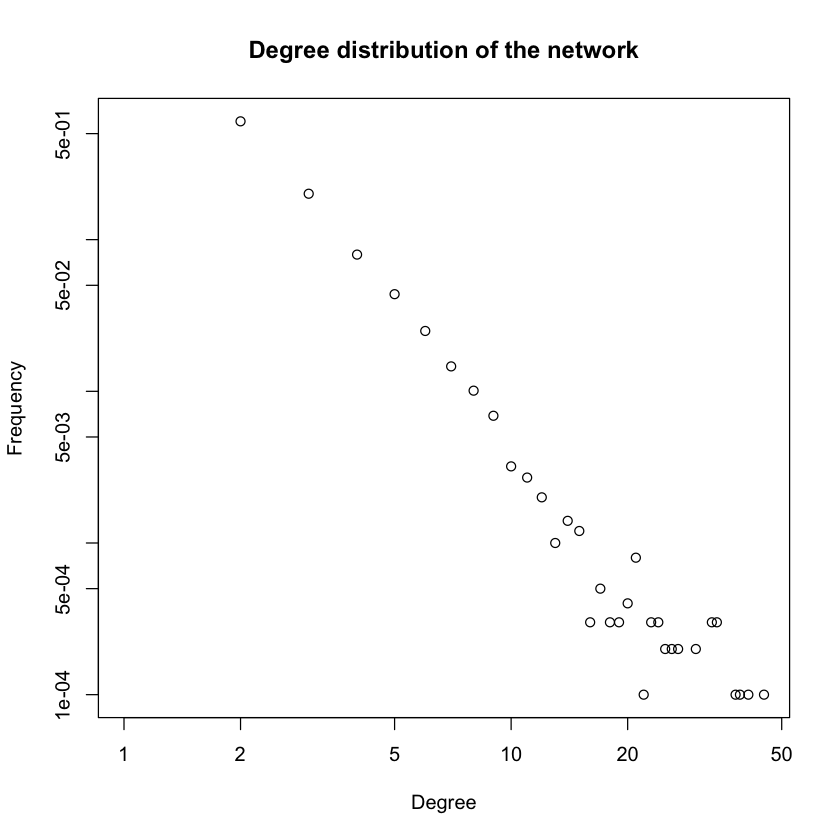

In [32]:
##check if its simple_pa
g = barabasi.game(10000, m=1, directed=F)
degreesVector <- degree(g)
#hist(degreesVector)
print(mean(degreesVector))
print(is.connected(g))
#print(var(degreesVector))
#plot(g,vertex.size=5, vertex.label.cex=0.1)    
g.components <- clusters(g)
#print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fc <- cluster_fast_greedy(g)
#membership(fc)
#sizes(fc)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')

[1] 1.9998
[1] TRUE
[1] 10000


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“22 y values <= 0 omitted from logarithmic plot”Warning message in plot.window(...):
“nonfinite axis limits [GScale(-inf,2.48572,2, .); log=1]”Warning message in axis(...):
“"log" is not a graphical parameter”

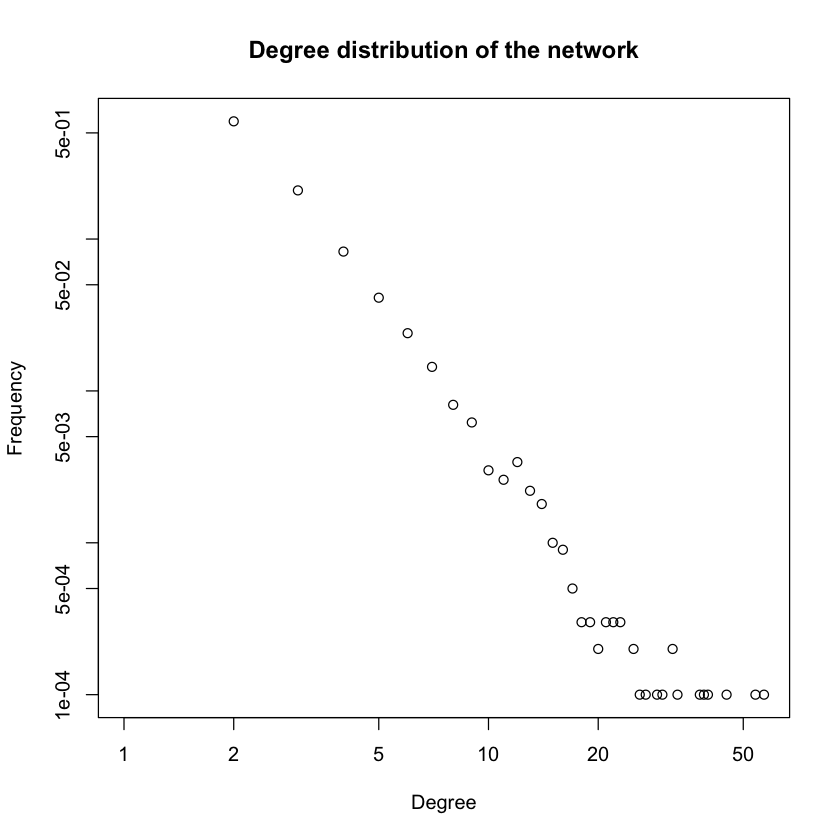

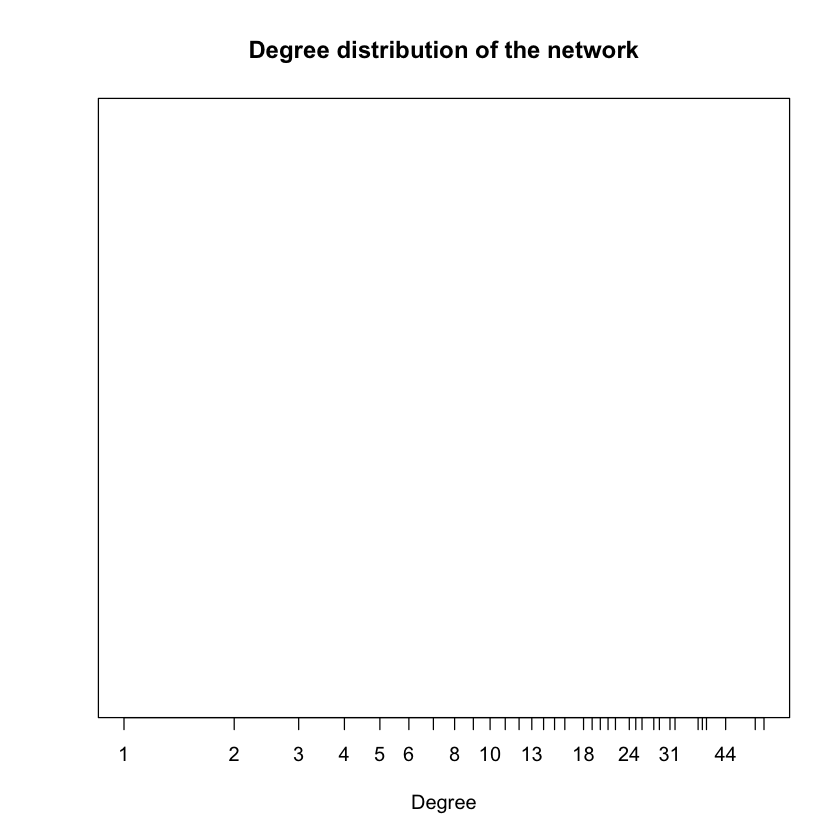

In [39]:
gsize = 10000
g = barabasi.game(gsize, m=1, directed=F)
degreesVector <- degree(g)
#hist(degreesVector)
print(mean(degreesVector))
print(is.connected(g))
#print(var(degreesVector))
#plot(g,vertex.size=5, vertex.label.cex=0.1)    
g.components <- clusters(g)
#print(g.components$csize)
# which is the largest component
ix <- which.max(g.components$csize)
# get the subgraph correspondent to just the giant component
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
print(vcount(g.giant))
fc <- cluster_fast_greedy(g)
#membership(fc)
#sizes(fc)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')
degreel = c()
for (v in sample(1:1000,1000)){
    neighs = neighbors(g,v)
    degree_ = 0
    if(length(neighs)>0){
        neigh2 = sample(neighs,1)
        degree_ = degree(g,neigh2)
        
    
    }
    degreel = c(degreel, degree_)
    
}
plot(table(degreel),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')


In [51]:
typeof(table(degreel)[1][1])

[1] "integer"